In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the job dataset
data = pd.read_csv('dataset/data_encoded.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24824 entries, 0 to 24823
Columns: 101 entries, id to Top Management / Manajemen Tingkat Atas
dtypes: int64(101)
memory usage: 19.1 MB


In [3]:
# Feature selection
feature = data.drop(['id'], axis=1)
label = data['id']

feature.head()

,location,career_level,experience_level,company_industry,Kontrak,Paruh Waktu,Penuh Waktu,Temporer,D3 (Diploma),D4 (Diploma),...,Teknik Elektronika,Teknik Industri,Teknik Kimia,Teknik Lainnya,Teknik Lingkungan,Teknik Sipil/Konstruksi Bangunan,Teknikal & Bantuan Pelanggan,Teknologi Makanan/Ahli Gizi,Telesales/Telemarketing,Top Management / Manajemen Tingkat Atas
0,57,0,0,29,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,57,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42,1,0,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,2,2,29,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,180,2,3,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Feature scalling

MAX_LOCATION = 193
MAX_CAREER_LEVEL = 4
MAX_EXPERIENCE_LEVEL = 19
MAX_COMPANY_INDUSTRY = 57

feature['location'] = feature['location'] / MAX_LOCATION
feature['career_level'] = feature['career_level'] / MAX_CAREER_LEVEL
feature['experience_level'] = feature['experience_level'] / MAX_EXPERIENCE_LEVEL
feature['company_industry'] = feature['company_industry'] / MAX_COMPANY_INDUSTRY

feature.head()

,location,career_level,experience_level,company_industry,Kontrak,Paruh Waktu,Penuh Waktu,Temporer,D3 (Diploma),D4 (Diploma),...,Teknik Elektronika,Teknik Industri,Teknik Kimia,Teknik Lainnya,Teknik Lingkungan,Teknik Sipil/Konstruksi Bangunan,Teknikal & Bantuan Pelanggan,Teknologi Makanan/Ahli Gizi,Telesales/Telemarketing,Top Management / Manajemen Tingkat Atas
0,0.295337,0.00,0.000000,0.508772,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.284974,0.25,0.052632,1.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.217617,0.25,0.000000,0.877193,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.108808,0.50,0.105263,0.508772,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.932642,0.50,0.157895,0.877193,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Define the input shape
input_shape = feature.shape[1]
output_shape = len(label)

input_shape, output_shape

(100, 24824)

In [6]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_shape, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 24824)             819192    
                                                                 
Total params: 827,736
Trainable params: 827,736
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [8]:
# Get train feature
X = feature.values
y = pd.get_dummies(label).values  # One-hot encode job IDs

In [9]:
# Train the model
history = model.fit(X, y, epochs=10)

Epoch 1/10
776/776 [==============================] - 14s 17ms/step - loss: 10.2520
Epoch 2/10
776/776 [==============================] - 13s 17ms/step - loss: 10.0599
Epoch 3/10
776/776 [==============================] - 13s 17ms/step - loss: 9.0809
Epoch 4/10
776/776 [==============================] - 14s 18ms/step - loss: 7.6124
Epoch 5/10
776/776 [==============================] - 14s 18ms/step - loss: 6.4094
Epoch 6/10
776/776 [==============================] - 14s 17ms/step - loss: 5.4902
Epoch 7/10
776/776 [==============================] - 14s 18ms/step - loss: 4.7945
Epoch 8/10
776/776 [==============================] - 14s 19ms/step - loss: 4.2812
Epoch 9/10
776/776 [==============================] - 16s 21ms/step - loss: 3.9198
Epoch 10/10
776/776 [==============================] - 14s 19ms/step - loss: 3.6613


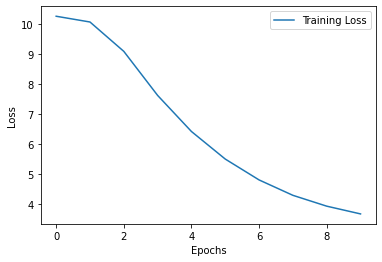

In [10]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']

plt.plot(train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model.save('model/saved_model.h5')

In [13]:
import pickle

pickle.dump(model, open('model/saved_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://f31e2e9a-286a-4dea-91f4-bc2cd3abe60e/assets


In [15]:
import joblib

joblib.dump(model, 'model/saved_model_joblib.pkl')

INFO:tensorflow:Assets written to: ram://47e8fec1-e4f8-4c36-b49c-0ea47c2cffff/assets


['model/saved_model_joblib.pkl']